In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nibabel as nib
import nilearn
from nilearn import datasets

from nilearn import surface
from scipy import stats
from nilearn import  plotting

In [17]:
nki_dataset = datasets.fetch_surf_nki_enhanced(n_subjects=1)
nki_dataset["func_left"] + nki_dataset["func_right"] # 左脑和右脑的功能连接结果文件
nki_dataset["phenotypic"]                            # 样本年龄、性别等信息

array([('A00028185', 26., 'R', 'M')],
      dtype=[('Subject', '<U9'), ('Age', '<f8'), ('Dominant_Hand', '<U1'), ('Sex', '<U1')])

In [39]:
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()
parcellation = destrieux_atlas["map_left"]
labels = destrieux_atlas["labels"]
len(destrieux_atlas["labels"]), destrieux_atlas["map_left"].shape, destrieux_atlas["map_right"].shape

(76, (10242,), (10242,))

In [2]:
fsaverage = datasets.fetch_surf_fsaverage()

/mnt/d/workdir_for_Linux/software/Miniconda3/envs/proteomics/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


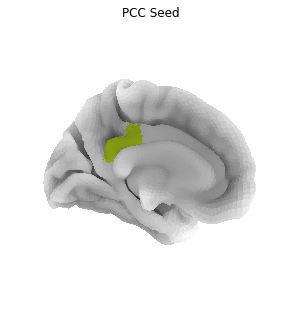

In [67]:
from nilearn import surface
from scipy import stats
from nilearn import  plotting

timeseries = surface.load_surf_data( nki_dataset["func_left"][0] )
pcc_region = b'G_cingul-Post-dorsal'
pcc_labels = np.where(parcellation == labels.index(pcc_region))[0]
seed_timeseries = timeseries[pcc_labels].mean(axis=0)

stat_map = np.array([stats.pearsonr(seed_timeseries, timeseries[i, :])[0] 
                     for i in range(timeseries.shape[0]) ])
stat_map[np.where(np.mean(timeseries, axis=1) == 0)] = 0

pcc_map = np.zeros(parcellation.shape[0], dtype=int)
pcc_map[pcc_labels] = 1
plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=pcc_map,
                       hemi='left', view='medial', bg_map=fsaverage['sulc_left'],
                       bg_on_data=True, title='PCC Seed')
plotting.show()

In [4]:
fsaverage['pial_left']

'/mnt/d/workdir_for_Linux/software/Miniconda3/envs/proteomics/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/pial_left.gii.gz'

In [8]:
surface.load_surf_mesh(fsaverage['pial_left'])

mesh(coordinates=array([[-38.73596 , -19.343365,  67.22014 ],
       [-16.662487, -69.061226,  61.281273],
       [ -9.717618,  -9.233264,  46.58034 ],
       ...,
       [-30.751953, -27.045898, -27.080143],
       [-32.775867, -25.899866, -25.520136],
       [-34.49119 , -25.403906, -24.645117]], dtype=float32), faces=array([[    0,  2564,  2562],
       [    0,  2562,  2565],
       [    0,  2565,  2567],
       ...,
       [10241,  9918,  2454],
       [10161,  9918, 10241],
       [10161,    11,  9918]], dtype=int32))

In [14]:
surface.load_surf_data(fsaverage['sulc_left']).shape

(10242,)

In [15]:
surface.load_surf_mesh(fsaverage['pial_left'])[0].shape

(10242, 3)

In [3]:
fsaverage['sulc_left']

'/mnt/d/workdir_for_Linux/software/Miniconda3/envs/proteomics/lib/python3.8/site-packages/nilearn/datasets/data/fsaverage5/sulc_left.gii.gz'

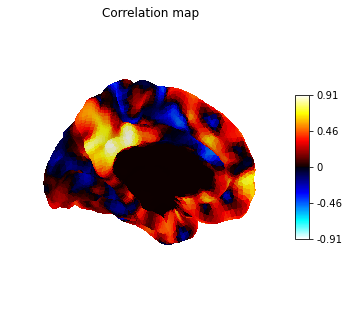

In [77]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], rot_map=pcc_map,
                            stat_map=stat_map,
                            hemi='left', view='medial', colorbar=True, 
                            bg_map=fsaverage['sulc_left'], darkness=.3,
                            bg_on_data=True, title='Correlation map')
plotting.show()

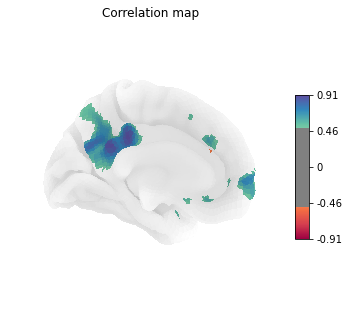

In [76]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=stat_map,
                            hemi='left', view='medial', colorbar=True, 
                            bg_map=fsaverage['sulc_left'], darkness=.3, 
                            threshold=.5, cmap='Spectral',
                            bg_on_data=True, title='Correlation map')
plotting.show()

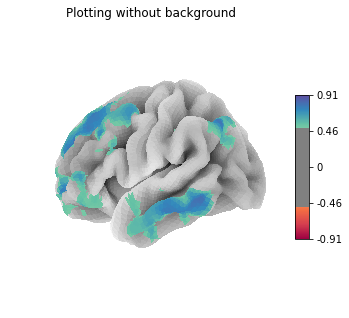

In [83]:
plotting.plot_surf_stat_map(fsaverage['pial_left'], stat_map=stat_map,
                            hemi='left', view='lateral', colorbar=True,
                            bg_map = fsaverage['sulc_left'],
                            cmap='Spectral', threshold=.5, bg_on_data=False,
                            title='Plotting without background')
plotting.show()